In the following notebook a rough idea for the calculation of a sensitivity curve for a potential acoustic neutrino telescope will be drawn up. This will be done following a paper by the KM3Net collaboration.

https://www.km3net.org/wp-content/uploads/2023/05/KM3NeT_DS_TDR-published-in-2010.pdf

In [1]:
from scipy.integrate import quad
from scipy.integrate import simps
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

Every single one of the following calculations will be done for different energies. In order to make a rather smooth curve we will use the following energy range and values:

E(eV) = [$10^{16}, 10^{16.5}, 10^{17}, 10^{17.5}, 10^{18}, 10^{18.5}, 10^{19}$]

In [36]:
E = [10**16, 10**(16.5), 10**17, 10**(17.5), 10**18, 10**(18.5), 10**19]

# from https://arxiv.org/pdf/1305.7513.pdf we find the neutrino cross sections
cross_section = [10**(-6.9), 10**(-7.2), 10**(-7.6), 10**(-7.7), 10**(-7.8), 10**(-7.85), 10**(-7.9)]

The first thing needed for a sensitivity curve is the *Detector Effective Volume* ($V_{eff}(E_{\nu}, \theta_{\nu})$). This is defined by the following formula:

$$ V_{eff}(E_{\nu}, \theta_{\nu}) = \frac{N_{rec}(E_{\nu}, \theta_{\nu})}{N_{gen}(E_{\nu}, \theta_{\nu})} * V_{gen}$$

**Parameters:**
* $N_{rec}(E_{\nu}, \theta_{\nu})$ = number of reconstructed events
* $N_{gen}(E_{\nu}, \theta_{\nu})$ = neutrino interactions in $V_{gen}$
* $V_{gen}$ = generation volume

In [38]:
def detector_effective_volume(Nrec, Ngen, Vgen):
    # initialize a list to store values
    Veff = []
    
    # plug in the above formula
    for i in range(0, len(Nrec)):
        Veff_value = (Nrec[i] / Ngen[i]) * Vgen
        Veff.append(Veff_value)
        
    return Veff

In [39]:
# Nrec = can be determined after running Monte Carlo 
# Ngen = can be determined after running Monte Carlo 
# Vgen = can be determined after running Monte Carlo 

# for an optimal scenario
Nrec_best = [10, 10, 10, 10, 10, 10, 10]    # as long as this is the same as Ngen_best the 
Ngen_best = [10, 10, 10, 10, 10, 10, 10]    # detector is functioning in full potential
Vgen_best = 65500                           # in km --> sphere with a radius of 25 km

# calculate the best possible effective volume
Veff_best = detector_effective_volume(Nrec_best, Ngen_best, Vgen_best)

print(f"The best possible effective volume of the detector would be {Veff_best} km^3.")

The best possible effective volume of the detector would be [65500.0, 65500.0, 65500.0, 65500.0, 65500.0, 65500.0, 65500.0] km^3.


Then the *Neurtino Effective Area* ($A_{eff}^{\nu}(E_{\nu}, \theta_{\nu})$) can be calculated with the following formula: 

$$A_{eff}^{\nu}(E_{\nu}, \theta_{\nu}) = V_{eff}(E_{\nu}, \theta_{\nu}) \times \rho N_A \times \sigma(E_{\nu}) \times P_{earth}(E_{\nu}, \theta_{\nu})$$

**Parameters:**
* $A_{eff}^{\nu}(E_{\nu}, \theta_{\nu})$ = neutrino effective area
* $V_{eff}(E_{\nu}, \theta_{\nu})$ = detector effective formula calculated above
* $\rho N_A$ = number of nucleons per unit volume ($\rho$ = effective matter density [$\frac{mol}{V}$], $N_A$ = Avogadro number)
* $\sigma(E_{\nu})$ = neutrino cross section in the reaction channel considered
* $P_{earth}(E_{\nu}, \theta_{\nu})$ = neutrino transmission probability through the Earth

In [29]:
def neutrino_effective_area(Nrec, Ngen, Vgen, rho, Na, sigma, Pearth):
    
    # define the detector effective volume
    Veff = detector_effective_volume(Nrec, Ngen, Vgen)
    
    # plug in the above formula
    Aeff = Veff * rho * Na * sigma * Pearth
        
    return Aeff

For neutrino cross-section, look in the following article: https://arxiv.org/pdf/1305.7513.pdf

The *Neutrino Transmission Probability* is the likelihood that a neutrino of a certain energy and initial flavor, traveling through the Earth's matter, will retain its flavor or change to a different flavor before being detected. In the SeaGen code this quantity is formulised as the following:

$$P_{earth}(E_{\nu}, cos θ_{\nu}) = e^{−N_A*\sigma(E_{\nu})* \rho_l(θ_{\nu})}$$

**Parameters:**
* $P_{earth}(E_{\nu}, cos θ_{\nu})$ = the neutrino transmission probability through earth
* $N_A$ = Avogadro's number
* $\sigma(E_{\nu})$ = neutrino cross section in the reaction channel considered
* $\rho_l(θ_{\nu})$ = is the amount of material encountered by a neutrino in its passage through the Earth

https://arxiv.org/pdf/1602.00501.pdf

In [5]:
def neutrino_transmission_probability(Na, sigma):
    
    # find the material to cross in earth
    material = amount_of_material_earth(rho_earth, L)
    
    # perform the function
    Pearth = np.exp**(-Na * sigma * material)
    
    return Pearth

The amount of material encountered in earth can be determined with the following formula:

$$\rho_l(θ_{\nu}) = \int_{L} \rho_{earth(r)} dl$$

**Parameters:**
* $L$ = neutrino path at angle $\theta_{\nu}$
* $\rho_{earth(r)}$ = PREM Model of the earth following https://lweb.cfa.harvard.edu/~lzeng/papers/PREM.pdf

In [6]:
def amount_of_material_earth(rho_earth, L):

    # perform the integral
    result, _ = spi.quad(rho_earth, 0, L)

    return result

In [33]:
# put in known values
Na = 6.022e23                    # Avogadro number
sigma = cross_section            # Neutrino cross section

# use some arbitrary values instead of formula's that are energy dependent
rho_best = 10**15                # in g/km^3 = 1 g/cm^3 --> Effective matter density in mol per volume
Pearth_best = 0.9                # Neutrino transmission probability through the Earth

# calculate the best possible area
Aeff_best = neutrino_effective_area(Nrec_best, Ngen_best, Vgen_best, rho_best, Na, sigma_best, Pearth_best)

print(f"The best possible neutrino effective area would be {Aeff_best} km^2.")

The best possible neutrino effective area would be 3.549969e+28 km^2.


In [7]:
#L = ???
#rho_earth = ???

In [8]:
# define Avogadro's constant [mol^-1]
Na = 6.02214076 * 10**(23)

In [9]:
# find Veff with the above defined formula
Veff = detector_effective_volume(Nrec, Ngen, Vgen)

# define the density of water at a depth of 1500 m [g/cm^3]
density = 0.998
# get the molar mass of water [g/mol]
molar_mass = 18.01528 
# the matter density is then [mol/cm^3]
rho = density / molar_mass

# http://cupp.oulu.fi/neutrino/nd-cross.html
#sigma = ???

NameError: name 'Nrec' is not defined

Lastly, to find the *Number of Detectable Events* ($N_s$) we can use the following formula:

$$N_s = \int \int A_{eff}^{\nu}(E_{\nu}, \theta_{\nu}) \frac{d\phi_{\nu}}{dE_{\nu}d\theta_{\nu}} dE_{\nu}d\theta_{\nu}$$

**Parameters:**
* $N_s$ = number of detectable events
* $A_{eff}^{\nu}(E_{\nu}, \theta_{\nu})$ = neutrino effective area calculated above
* $\frac{d\phi_{\nu}}{dE_{\nu}d\theta_{\nu}}$ = predicted astrophysical flux 

First we need a function for the predicted astrophysical flux. This we can find in the following source where they approximatethe flux around $10^{19}$ eV to be:

$$(\frac{d\phi_{\nu}}{dE_{\nu}})_{limit} = \frac{1 - 4 \times 10^{-8}}{E_{\nu}^2} GeV cm^{-2} s^{-1} sr^{-1}$$

We also know:

$$ \frac{d\phi_{\nu}}{dE_{\nu}d\theta_{\nu}} = \frac{d\phi_{\nu}}{dE_{\nu}} * \frac{1}{\Omega} $$

https://iopscience.iop.org/article/10.1086/340281/pdf

In [ ]:
def predicted_astrophysical_flux(E, solid_angle):
    # (dphi)/(dE dtheta)
    dphi_dEdtheta = (4 * 10**(-8) / E**2) * (1 / solid_angle) 
    return dphi_dEdtheta

In [11]:
def astrophysical_flux_limit(E):
    # (dphi)/(dE)
    dphi_dE = (1 * 10**(-8) / E**2) 
    return dphi_dE

In [20]:
# Set up the energy range
E_v_log = np.linspace(0, 20, 100)
E_v = [10**i for i in E_v_log]
E_v_GeV = [i - 9 for i in E_v_log]

# Initialize list
flux = []

# Loop through the energies
for i in range(len(E_v)):
    energy = E_v[i]
    flux_i = astrophysical_flux_limit(energy)
    flux.append(flux_i)

flux_log = [np.log10(i) for i in flux]
flux_E_log_list = []

for i in range(0, len(E_v)):
    flux_E = flux[i] * (E_v[i])**2
    flux_E_log = np.log10(flux_E)
    flux_E_log_list.append(flux_E_log)

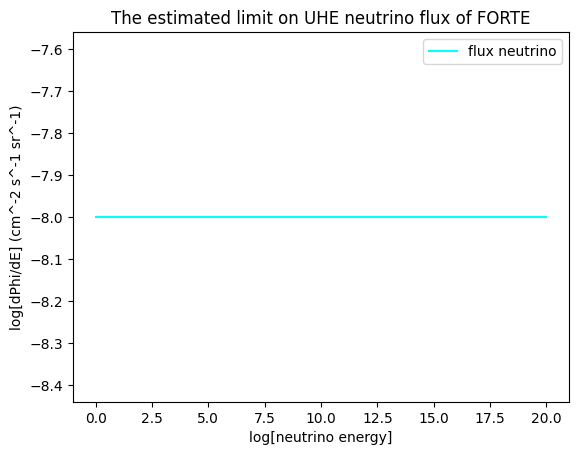

In [21]:
# plot the neutrino energies against the flux values in a graph
plt.plot(E_v_log, flux_E_log_list, label='flux neutrino', color='cyan')

# Add labels and a title
plt.xlabel('log[neutrino energy]')

plt.ylabel('log[dPhi/dE] (cm^-2 s^-1 sr^-1)')

plt.title('The estimated limit on UHE neutrino flux of FORTE')
plt.legend()

# Show the plot
plt.show()

In [14]:
# calculate the solid angle of the detector
# solid_angle = ???

In [15]:
def number_of_detectable_events(Nrec, Ngen, Vgen, rho, Na, sigma, Pearth, E, solid_angle):
    
    # define the function to be integrated
    def integrand(Nrec, Ngen, Vgen, rho, Na, sigma, Pearth, E, solid_angle):
        
        # define the neutrino effective area
        Aeff = neutrino_effective_area(Nrec, Ngen, Vgen, rho, Na, sigma, Pearth)
        
        # define the neutrino effective area
        astrophysical_flux = predicted_astrophysical_flux(E, solid_angle)
        
        return Aeff * astrophysical_flux

    # Define the limits of integration for E_nu and theta_nu
    E_nu_min = 10**(16)  
    E_nu_max = 10**(21)
    theta_nu_min = ???
    theta_nu_max = ???

    # Calculate the integral
    result, _ = dblquad(integrand, theta_nu_min, theta_nu_max, lambda _: E_nu_min, lambda _: E_nu_max)

    return result

SyntaxError: invalid syntax (1283706790.py, line 17)

In [23]:
import numpy as np
import matplotlib.pyplot as plt


    return A

# Function to calculate the detector effective volume
def detector_effective_volume(N_rec, N_gen, V_gen):
    # Calculate effective volume
    V_eff = V_gen * (N_rec / N_gen)

    return V_eff

# Function to calculate the Model Rejection Factor
def model_rejection_factor(N_signal_upper_limit, N_signal_expected):
    # Calculate Model Rejection Factor
    MRF = N_signal_upper_limit / N_signal_expected

    return MRF

# Energy range
energy_range = np.linspace(1, 10, 100)  # Example energy range from 1 to 10

# Flux model parameters
flux_model_normalization = 1.0  # Adjust as needed

# Arrays to store results
sensitivities = []

# Iterate over energy range
for energy in energy_range:
    # Example: Calculate the effective area and effective volume
    A = neutrino_effective_area(energy, np.pi / 4)
    V_eff = detector_effective_volume(100, 200, 1000)  # Example values for N_rec, N_gen, V_gen

    # Calculate the average flux limit
    phi_S = flux_model_normalization
    mu_90 = 1.0  # Example mean number of background events

    # Example: Calculate the Model Rejection Factor
    N_signal_upper_limit = 5  # Adjust as needed
    N_signal_expected = phi_S * V_eff

    MRF = model_rejection_factor(N_signal_upper_limit, N_signal_expected)

    # Store sensitivity values
    sensitivity = 1 / MRF
    sensitivities.append(sensitivity)

# Plot the sensitivity
plt.plot(energy_range, sensitivities, label='Sensitivity')
plt.xlabel('Energy (GeV)')
plt.ylabel('Sensitivity')
plt.title('Telescope Sensitivity vs. Energy')
plt.legend()
plt.show()

IndentationError: unexpected indent (3769427104.py, line 5)

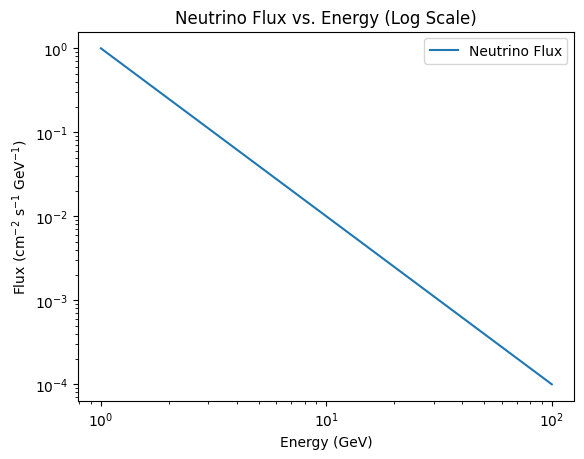

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the neutrino flux model (replace this with your actual model)
def neutrino_flux_model(E_nu):
    # Example: Power-law flux model (adjust as needed)
    phi_0 = 1.0  # Normalization constant
    gamma = -2.0  # Spectral index

    return phi_0 * (E_nu ** gamma)

# Function to calculate the Model Rejection Factor
def model_rejection_factor(N_signal_upper_limit, N_signal_expected):
    # Calculate Model Rejection Factor
    MRF = N_signal_upper_limit / N_signal_expected

    return MRF

# Energy range
energy_range = np.logspace(0, 2, 100)  # Logarithmic energy range from 1 GeV to 100 GeV

# Flux model parameters
flux_model = np.vectorize(neutrino_flux_model)

# Arrays to store results
flux_values = []

# Iterate over energy range
for energy in energy_range:
    # Example: Calculate the flux at each energy
    flux = flux_model(energy)

    # Store flux values
    flux_values.append(flux)

# Plot the flux against energy with log scale on both axes
plt.plot(energy_range, flux_values, label='Neutrino Flux')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Flux (cm$^{-2}$ s$^{-1}$ GeV$^{-1}$)')
plt.title('Neutrino Flux vs. Energy (Log Scale)')
plt.legend()
plt.show()

## Things to find out

#### Parameters
* Nrec 
* Ngen 
* Vgen 
* L
* rho_earth
* sigma
* solid_angle
* Pearth = 1 since no neutrino's are able to get through

**Theoretical Modeling:**
* Astrophysical neutrino flux models predict the expected flux of neutrinos coming from various astrophysical sources (e.g., supernovae, active galactic nuclei, gamma-ray bursts).
* Cross-section models describe the likelihood of neutrino interactions with the detector material, taking into account the energy of the neutrinos and the specific reaction channel.
* Neutrino transmission probability through the Earth (Pearth) accounts for the fact that neutrinos must pass through the Earth to reach the detector.

**Simulation:**
* To calculate the effective area (Aeff) and effective volume (Veff) for the detector, you would typically use simulations.
* Simulate the detector's response to neutrinos of different energies (Eν) and arrival angles (θν).
* Simulate the detector's response to background events.
* Generate Monte Carlo data sets that mimic the expected interactions of neutrinos and background events in the detector.

**Data Analysis:**
* Analyze the simulated data sets and evaluate the detector's response to both signal (neutrinos) and background events.
* Apply event reconstruction algorithms to identify and reconstruct neutrino interactions.
* Calculate the number of reconstructed events (Nrec) and background events (if any) for each energy (Eν) and arrival angle (θν).

**Sensitivity Calculation:**
* Use the reconstructed events and background events to calculate the detector's effective volume (Ve f f) as a function of energy (Eν) and angle (θν).
* Apply the theoretical model for the astrophysical neutrino flux (Φ(Eν, θν)).
* Calculate the number of detectable events (Ndet) using the formula Ndet = Φ(Eν, θν) × A(Eν, θν) × Ve f f (Eν, θν).

**Discovery or Limit Setting:**
* Depending on the goals of the analysis (discovery or limit setting), apply statistical techniques.
* For discovery, optimize cuts and thresholds to determine the least signal necessary for a discovery based on the model discovery potential (MDP).
* For limit setting, calculate the model rejection factor (MRF) to set upper limits on the expected signal, assuming no true signal is present.

**Sensitivity Report:**
* Provide sensitivity values for different energy ranges, angles, and levels of significance (e.g., 3σ, 5σ).
* Report the sensitivity of the detector to different types of neutrino sources, as predicted by the astrophysical neutrino flux models.